### Data: Old mobile phones

### Hypothesis:
1. What are the top 5 mobile phone brands by number of users? Show how many users each company has and what part of users these companies take?
2. Which 5 models of the most popular phone brand are the most popular according to the number of users?

In [1]:
import matplotlib.pyplot as plt
import mysql.connector as cnt

In [2]:
DB = cnt.connect(
    host = '88.223.121.130',
    port = 3306,
    user = 'user',
    password = 'slaptazodis'
)

c = DB.cursor()
c.execute('USE works')

1. What are the top 5 mobile phone brands by number of users? Show how many users each company has and what part of users these companies take?

In [3]:
sql = '''
SELECT device_brand, COUNT(*)
FROM sa
WHERE device_brand != ''
GROUP BY device_brand
ORDER BY COUNT(*) DESC
LIMIT 5;
'''
c.execute(sql)
ans = c.fetchall()
companies = []
counts = []
for row in ans:
	companies.append(row[0])
	counts.append(row[1])

sql = '''
SELECT COUNT(device_brand)
FROM sa
WHERE device_brand != '';
'''
c.execute(sql)
ans = c.fetchall()
all = ans[0][0]
diff = all-sum(counts)

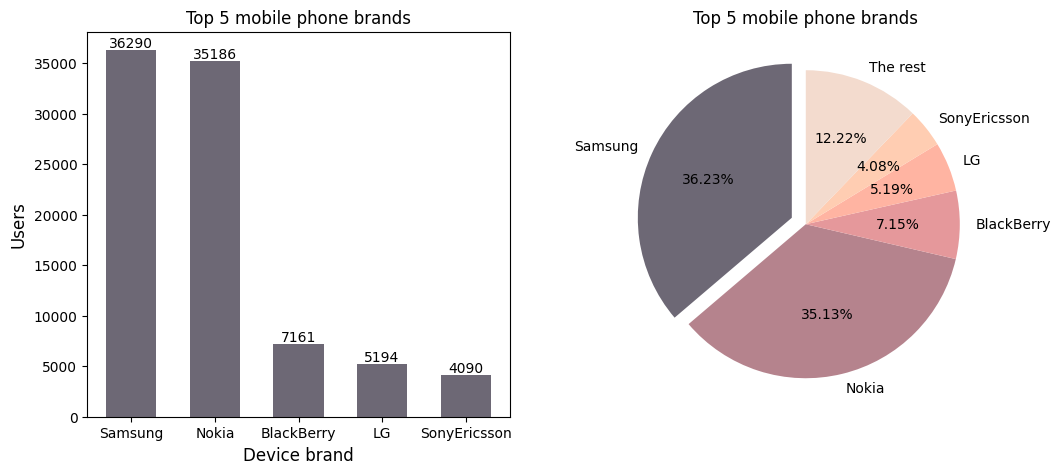

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

A = ax1.bar(companies, counts, color='#6d6875', width=0.6)
ax1.bar_label(A)
ax1.tick_params(axis='x', rotation=0)
ax1.set_xlabel('Device brand', fontsize=12)
ax1.set_ylabel('Users', fontsize=12)
ax1.set_title('Top 5 mobile phone brands')

x = counts.copy()
x.append(diff)
comps = companies.copy()
comps.append('The rest')
colors = ['#6d6875','#b5838d','#e5989b','#ffb4a2','#ffcdb2','#f3dbce']
ax2.pie(x, labels=comps, autopct='%.2f%%', startangle = 90, explode = [0.1,0,0,0,0,0], colors=colors)
ax2.set_title('Top 5 mobile phone brands')

plt.show()

2. Which 5 models of the most popular phone brand are the most popular according to the number of users?

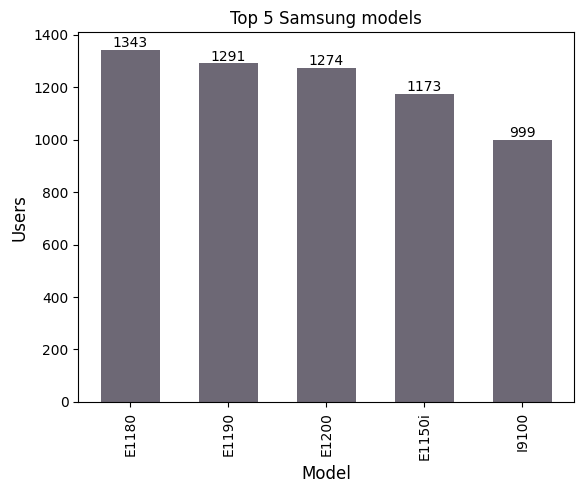

In [5]:
sql = '''
SELECT device_model, COUNT(*)
FROM sa
WHERE device_brand = (SELECT device_brand
	FROM sa
    WHERE device_brand != ''
	GROUP BY device_brand
	ORDER BY COUNT(*) DESC
	LIMIT 1
    )
GROUP BY device_model
ORDER BY COUNT(*) DESC
LIMIT 5;
'''
c.execute(sql)
ans = c.fetchall()
modelis = []
kiekis = []
for row in ans:
	modelis.append(row[0])
	kiekis.append(row[1])

fig, ax = plt.subplots()

A = ax.bar(modelis, kiekis, width=0.6, color='#6d6875')
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Users', fontsize=12)
ax.bar_label(A)
ax.set_title('Top 5 Samsung models')
ax.set_xticks(modelis)
ax.set_xticklabels(modelis, rotation=90)

plt.show()

In [6]:
DB.close()

### Insights:
1. According to the data Samsung and Nokia were way ahead among other manufacturers in terms of number of users and shared over 70% of the market.
2. The most popular Samsung models were E1180, E1190, E1200, E1150i, I9100. Although I9100 was a touchscreen mobile phone, it wasn't the most popular type of phone yet.